## Clasificador k-NN (k-Nearest Neighbors)

El **k-NN es un algoritmo de aprendizaje supervisado**, es decir, que a partir de una muestra inicial de datos su objetivo será el de clasificar correctamente todas las instancias nuevas.


El algoritmo **clasifica cada dato nuevo en el grupo que corresponda**, según tenga **k-vecinos** más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer. **Este grupo será, por tanto, el de mayor frecuencia con menores distancias.**

- Generalmente la función de distancia usada es la euclidiana.


_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html_

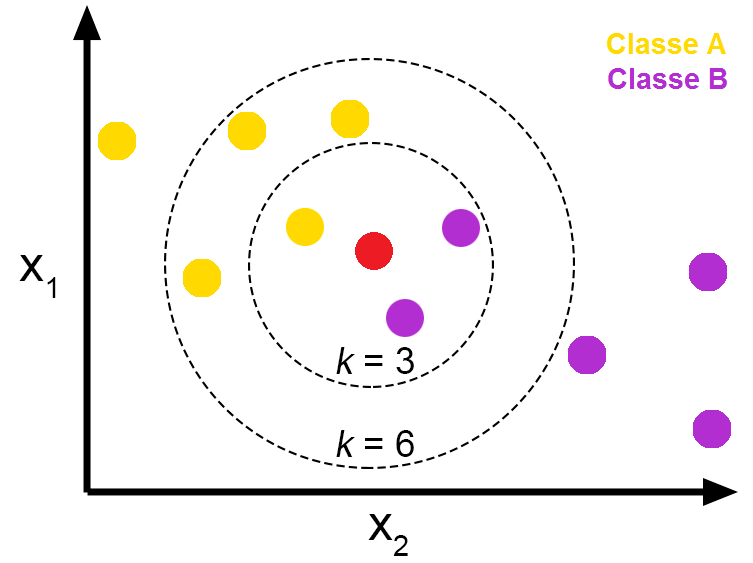

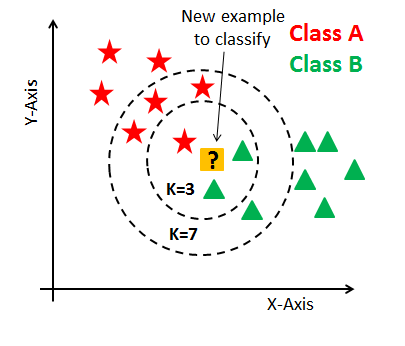

In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==2.0.2
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2
scikit-learn==1.6.1


In [3]:
df = pd.read_csv("../Data/iris.csv")

df

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo,Clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Preprocesamiento

In [4]:
# labelEncoder sobre la columna "Clase" para transformarla a numerica

from sklearn.preprocessing import LabelEncoder

clase_LabelEncoder = LabelEncoder()

clase = clase_LabelEncoder.fit_transform(df["Clase"]) # En este ejemplo estoy usando fit_transform()

df["Clase"] = clase

df

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo,Clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
X = np.array(df.drop("Clase", axis = 1))

y = np.array(df["Clase"])

X.shape, y.shape

((150, 4), (150,))

### Train, Test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (120, 4), y_train: (120,)
X_test: (30, 4),  y_test: (30,)


In [7]:
# Escalado de datos
# Es necesario para el algoritmo KNN que todos los datos se encuentren en la misma escala.
# De esta manera, el algoritmo puede evaluar cada columna o dimensión de manera equitativa.

# IMPROTANTE: Hacemos fit solo con los datos de train. Más adelante transformaremos los datos de test sin fit.

from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)

X_train

array([[0.08823529, 0.66666667, 0.        , 0.04166667],
       [0.41176471, 1.        , 0.0877193 , 0.125     ],
       [0.70588235, 0.45833333, 0.59649123, 0.54166667],
       [0.14705882, 0.58333333, 0.10526316, 0.04166667],
       [0.02941176, 0.5       , 0.05263158, 0.04166667],
       [0.58823529, 0.20833333, 0.70175439, 0.75      ],
       [0.61764706, 0.5       , 0.61403509, 0.58333333],
       [0.26470588, 0.625     , 0.0877193 , 0.04166667],
       [0.20588235, 0.66666667, 0.07017544, 0.04166667],
       [0.26470588, 0.875     , 0.0877193 , 0.        ],
       [0.44117647, 0.29166667, 0.71929825, 0.75      ],
       [0.5       , 0.58333333, 0.61403509, 0.625     ],
       [0.70588235, 0.45833333, 0.64912281, 0.58333333],
       [0.32352941, 0.79166667, 0.05263158, 0.125     ],
       [0.32352941, 0.70833333, 0.0877193 , 0.04166667],
       [0.35294118, 0.16666667, 0.47368421, 0.375     ],
       [0.58823529, 0.33333333, 0.71929825, 0.58333333],
       [0.61764706, 0.45833333,

### Modelo

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# 3-Nearest Neighbors

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicciones

In [10]:
X_test = x_scaler.transform(X_test)

yhat = model.predict(X_test)

yhat

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Métrica

In [11]:
from sklearn.metrics import accuracy_score

print(f"Accuracy: {accuracy_score(y_test, yhat)}")

Accuracy: 1.0


### Métodos del Modelo

In [12]:
# .predict_proba() retorna la probabilidad de una instancia de perterner a cada clase.

model.predict_proba(X_test)

# Como tenemos 3 clases diferentes entonces muestra la probabilidad de cada elemento de 
# Pertenerce a la clase 1, clase 2 o clase 3.

# El algormito elige a la clase a la que debe pertenecer donde el valor sea mayor.

# Estas probabilidades se calculan en función de cuántos de los vecinos cercanos pertenecen a dichas clases.

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

In [13]:
# .kneighbors retorna una tupla de arrays

model.kneighbors([X_test[0]])

# El primer elemento son las k-menores distancias (retorna 3 porque nuestro modelo esta entrenado con 3 vecinos)
# El segundo elemento son los indices de los k-elementos mas cercanos del conjunto X_train.

(array([[0.0931695 , 0.09623859, 0.1191498 ]]), array([[79, 39, 90]]))

In [14]:
X_train[[79, 39, 90]]

array([[0.52941176, 0.375     , 0.64912281, 0.54166667],
       [0.55882353, 0.375     , 0.57894737, 0.5       ],
       [0.52941176, 0.41666667, 0.63157895, 0.54166667]])

In [15]:
X_test[0]

array([0.52941176, 0.33333333, 0.64912281, 0.45833333])

In [16]:
y_train[[79, 39, 90]]

array([1, 1, 1])

### Predecir una nueva instancia

Si quisieramos predecir una nueva instancia utilizando el modelo que acabamos de definir, debemos hacer las mismas transformaciones que hemos hecho al conjunto de Train y Test, para que de esta forma el modelo entienda los valores.

In [17]:
nueva_instancia = np.array([5.0, 2.5, 3.9, 2.3])

nueva_instancia

array([5. , 2.5, 3.9, 2.3])

In [18]:
nueva_instancia = x_scaler.transform([nueva_instancia])

nueva_instancia

array([[0.20588235, 0.20833333, 0.50877193, 0.91666667]])

In [19]:
model.predict(nueva_instancia)

array([2])

In [20]:
model.predict_proba(nueva_instancia)

array([[0., 0., 1.]])

### k-NN para varias K's

Podemos hacer un bucle que entrene el algoritmo **`n-veces`**, cambiando en cada una la **`k`** para saber con cual tiene un mejor desempeño.

In [21]:
%%time

list_accuracy = list()

for k in range(1, 60):
    
    # Modelo
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    
    # Predicciones
    yhat = model.predict(X_test)
    
    # Metricas
    accuracy = accuracy_score(y_test, yhat)
    list_accuracy.append([k, accuracy])
    
    print(f"k: {k}, Acurracy. {accuracy}")

k: 1, Acurracy. 1.0
k: 2, Acurracy. 1.0
k: 3, Acurracy. 1.0
k: 4, Acurracy. 1.0
k: 5, Acurracy. 1.0
k: 6, Acurracy. 1.0
k: 7, Acurracy. 1.0
k: 8, Acurracy. 1.0
k: 9, Acurracy. 1.0
k: 10, Acurracy. 1.0
k: 11, Acurracy. 1.0
k: 12, Acurracy. 1.0
k: 13, Acurracy. 1.0
k: 14, Acurracy. 1.0
k: 15, Acurracy. 1.0
k: 16, Acurracy. 1.0
k: 17, Acurracy. 1.0
k: 18, Acurracy. 1.0
k: 19, Acurracy. 1.0
k: 20, Acurracy. 1.0
k: 21, Acurracy. 1.0
k: 22, Acurracy. 1.0
k: 23, Acurracy. 1.0
k: 24, Acurracy. 1.0
k: 25, Acurracy. 1.0
k: 26, Acurracy. 1.0
k: 27, Acurracy. 1.0
k: 28, Acurracy. 0.9666666666666667
k: 29, Acurracy. 0.9666666666666667
k: 30, Acurracy. 0.9666666666666667
k: 31, Acurracy. 0.9666666666666667
k: 32, Acurracy. 0.9666666666666667
k: 33, Acurracy. 0.9666666666666667
k: 34, Acurracy. 0.9666666666666667
k: 35, Acurracy. 0.9666666666666667
k: 36, Acurracy. 0.9666666666666667
k: 37, Acurracy. 0.9666666666666667
k: 38, Acurracy. 0.9666666666666667
k: 39, Acurracy. 0.9666666666666667
k: 40, Acu

In [22]:
list_accuracy = np.array(list_accuracy)

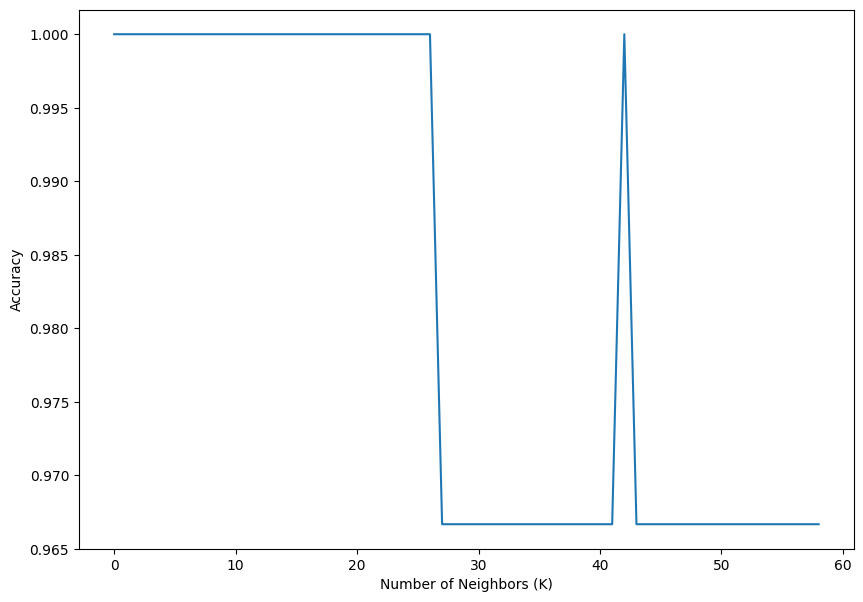

In [23]:
plt.figure(figsize = (10, 7))

plt.plot(list_accuracy[:, 1])

plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (K)")

plt.show()

In [24]:
mejor_indice = np.argmax(list_accuracy[:, 1])
mejor_indice

np.int64(0)

In [25]:
list_accuracy[mejor_indice, :]

# (k, accuracy)

array([1., 1.])

## Radius Neighbors Classifier

Es una extensión del algoritmo de k-Nearest Neighbors, que hace predicciones utilizando todas las instancias en el radio de una nueva instancia en lugar de los k-vecinos más cercanos.

Como tal, el enfoque basado en el radio para seleccionar vecinos es más apropiado para datos dispersos, evitando que las instancias que están muy lejos en el espacio de características (atributos) contribuyan a la predicción.

- El radio es definido por el usuario y por lo general se asume que los valores del conjunto de entrenamiento estan en un rango de 0 a 1 (Escalados).

_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html_

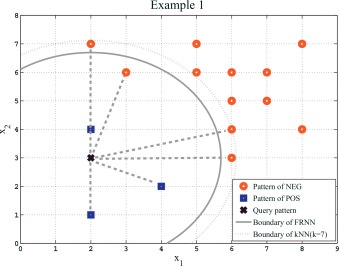


- Este enfoque **es apropiado para aquellos conjuntos de datos donde es deseable que la contribución de los vecinos sea proporcional a la densidad de instancias** en el espacio de características (atributos).


- Dado un radio fijo, **las regiones densas del espacio de características (atributos) contribuirán con más información y las regiones dispersas contribuirán con menos información**.


- Este último caso es el más deseable y **evita que las instancias muy lejanas en el espacio de características (atributos) de la nueva instancia contribuyan a la predicción**.


- Como tal, el **`RadiusNeighborsClassifier()`** puede ser **más apropiado** para problemas de predicción donde hay **regiones escasas del espacio de características (atributos)**.


- **Si los datos han sido normalizados, el radio debe de estar entre 0 y sqrt(n).**

In [26]:
from sklearn.neighbors import RadiusNeighborsClassifier

### Modelo

In [27]:
model = RadiusNeighborsClassifier(radius = 0.5)
model.fit(X_train, y_train)

RadiusNeighborsClassifier(radius=0.5)

### Predicciones

In [28]:
yhat = model.predict(X_test)

yhat

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

### Métricas

In [29]:
print(f"Accuracy: {accuracy_score(y_test, yhat)}")

Accuracy: 0.9666666666666667


In [30]:
model.predict_proba(X_test)

array([[0.        , 0.63492063, 0.36507937],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.57142857, 0.42857143],
       [0.        , 0.54411765, 0.45588235],
       [1.        , 0.        , 0.        ],
       [0.        , 0.69491525, 0.30508475],
       [0.        , 0.32727273, 0.67272727],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 0.69491525, 0.30508475],
       [0.        , 0.421875  , 0.578125  ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.5       ],
       [0.        , 0.35087719, 0.64912281],
       [0.        , 0.72222222, 0.27777778],
       [0.        , 0.68333333, 0.31666667],
       [0.        , 0.38333333, 0.61666667],
       [1.        , 0.        , 0.        ],
       [0.        , 0.52112676, 0.47887324],
       [1.

In [31]:
model.radius_neighbors([X_test[0]])

(array([array([0.31087424, 0.0931695 , 0.18958206, 0.29255171, 0.28593729,
               0.32699348, 0.25215976, 0.197027  , 0.31546096, 0.18789234,
               0.17266   , 0.42991441, 0.12968298, 0.26254041, 0.15495096,
               0.36601715, 0.19566622, 0.1272096 , 0.15813832, 0.21313585,
               0.2266477 , 0.16597095, 0.16327055, 0.30434695, 0.468632  ,
               0.20212965, 0.18108891, 0.15939356, 0.16876004, 0.31376445,
               0.09623859, 0.37861197, 0.26842326, 0.26573913, 0.31546096,
               0.29221749, 0.43910904, 0.25233478, 0.30226201, 0.17255033,
               0.46405254, 0.32507131, 0.25727055, 0.29027431, 0.45788138,
               0.18364185, 0.37361887, 0.1191498 , 0.20343841, 0.42028054,
               0.32091065, 0.27897893, 0.23765815, 0.24978364, 0.32497513,
               0.47612486, 0.29638568, 0.22895282, 0.30666883, 0.4969558 ,
               0.32371504, 0.4959318 , 0.30393088])                       ],
       dtype=object),
 

In [32]:
y_train[[15,  79,  73,  53,  68,   5,  65,  63,  10,  62, 118, 116, 115,
                30,  16, 112,  18, 111,  20,  22, 110,  25, 108, 107,  99,  96,
                93,  34,  92,  36,  89,  39,  40,  88,  42,  43,  44,  60,  81,
                47,  80,  49,  50,  45,  54,  76,  86,  87,  90,  95, 101, 109,
               113,   2,  12,  17,  85, 105,   6,  59,  69,  82,  97,  11]]

array([1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1])

### RadiusNeighborsClassifier para varios radios

In [33]:
%%time

list_accuracy = list()

for radio in np.arange(0, 3, 0.0001):
    
    try:
        # Modelo
        model = RadiusNeighborsClassifier(radius = radio)
        model.fit(X_train, y_train)

        # Predicciones
        yhat = model.predict(X_test)

        # Metricas
        accuracy = accuracy_score(y_test, yhat)
        list_accuracy.append([radio, accuracy])
        
    except:
        list_accuracy.append([radio, np.nan])
    
df_radios = pd.DataFrame(data = list_accuracy, columns = ["Radio", "Accuracy"]).dropna()

df_radios.sort_values("Accuracy", ascending = False)

CPU times: total: 9.38 s
Wall time: 29.3 s


,Radio,Accuracy
2285,0.2285,1.0
1611,0.1611,1.0
1566,0.1566,1.0
1565,0.1565,1.0
1596,0.1596,1.0
...,...,...
29988,2.9988,0.3
29987,2.9987,0.3
29970,2.9970,0.3
29969,2.9969,0.3


In [34]:
list_accuracy = np.array(df_radios)

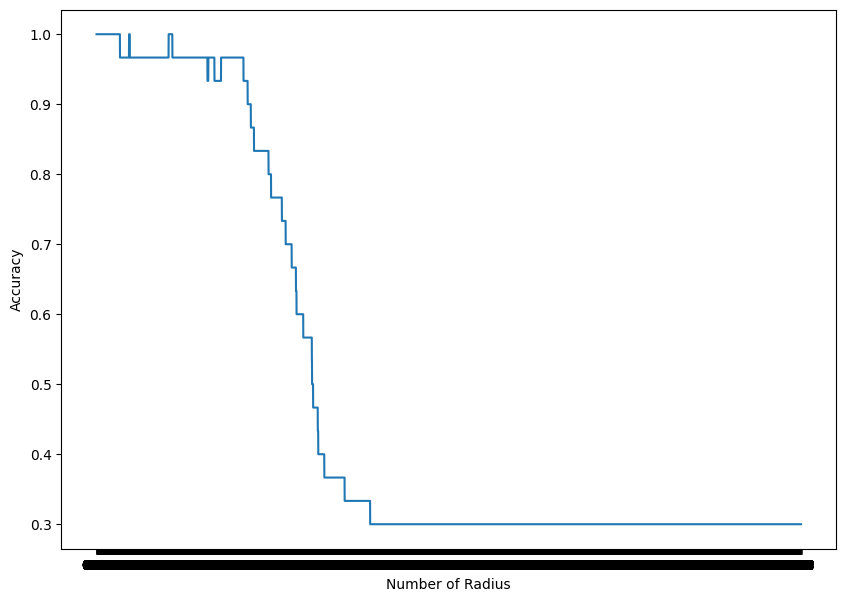

In [35]:
plt.figure(figsize = (10, 7))

plt.plot(list_accuracy[:, 1])

plt.ylabel("Accuracy")
plt.xlabel("Number of Radius")

plt.xticks(ticks = range(len(list_accuracy[:, 0])), labels = np.round(list_accuracy[:, 0], 2))

plt.show()

In [36]:
mejor_indice = np.argmax(list_accuracy[:, 1])

mejor_indice

np.int64(0)

In [37]:
list_accuracy[mejor_indice, :]

# (radio, accuracy)

array([0.1555, 1.    ])

In [38]:
################################################################################################################################

### Ejercicio 1:
- Utiliza el dataset del titanic para practicar ambos modelos (**kNN** y **RadiusNeighbors**)

In [39]:
# Datos

df = pd.read_csv(filepath_or_buffer = "../Data/titanic_preprocesamiento.csv")

X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

# Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# MinMaxScaler
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (700, 11), X_test: (176, 11)
y_train: (700,), y_test: (176,)


In [40]:
# KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

yhat_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, yhat_knn)

print(accuracy_knn)

0.8011363636363636


In [41]:
# RadiusNeighborsClassifier

rnn = RadiusNeighborsClassifier()

rnn.fit(X_train, y_train)

yhat_rnn = rnn.predict(X_test)

accuracy_rnn = accuracy_score(y_test, yhat_rnn)

print(accuracy_rnn)

0.7670454545454546


### Ejercicio 2:
- Intenta recrear el algormito de **`k-NN`**:

1. Sea **`x`** un patron de prueba a clasificar.
2. Calcular la distancia entre **`x`** y todos los patrones del conjunto de entrenamiento.
3. Se seleccionan los **`k`** patrones cuyas distancias sean menores.
4. Verificar cual es la clase más frecuente entre los **`k`** patrones seleccionados y asignar dicha clase a **`x`**.
5. Repite el algoritmo con otra formula de distancia.

Nota: La **`k`** se selecciona con un valor impar para evitar empates.

In [42]:
def distancia_euclideana(p1, p2):
    return np.sqrt(sum([(x - y)**2 for x, y in zip(p1, p2)]))

def distancia_manhattan(p1, p2):
    return sum([abs(x - y) for x, y in zip(p1, p2)])

def distancia_minkowski(p1, p2, p=3):
    return np.sum([abs(x - y)**p for x, y in zip(p1, p2)])**(1/p)

def distancia_chebyshev(p1, p2):
    return max([abs(x - y) for x, y in zip(p1, p2)])

In [43]:
class KNN:
    
    def __init__(self, distancia, k=5):
        self.k = k
        self.distancia = distancia
        
        self.target = None
        self.df = None
        
    def fit(self, X, y):
        self.target = y.name
        self.df = pd.concat([pd.DataFrame(X), pd.DataFrame(y).reset_index(drop=True)], axis=1)
        
    def predict(self, X):
        self.df["dist"] = [self.distancia(punto, X) for punto in self.df.drop(self.target, axis = 1).values]
        vecinos = self.df.sort_values("dist").head(self.k)
        prediccion = int(vecinos[self.target].value_counts().index[0])
        return prediccion

In [44]:
# Definimos un nuevo elemento
# Tiene todas las columnas excepto Survived
# Vamos a predecir si sobrevive o no

nueva_instancia = [26, 3, 2, 2, 1, 1, 0, 2.83907846, 0, 0, 1]

print(nueva_instancia)

[26, 3, 2, 2, 1, 1, 0, 2.83907846, 0, 0, 1]


In [45]:
# Distancia euclideana

model = KNN(distancia = distancia_euclideana)

model.fit(X_train, y_train)
nueva_instancia_escalada = x_scaler.transform([nueva_instancia])[0]
model.predict(nueva_instancia_escalada)

c:\dev\mod5-machine-learning-y-deep-learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0

In [46]:
# Distancia manhattan

model = KNN(distancia = distancia_manhattan)

model.fit(X_train, y_train)
nueva_instancia_escalada = x_scaler.transform([nueva_instancia])[0]
model.predict(nueva_instancia_escalada)

c:\dev\mod5-machine-learning-y-deep-learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0

In [47]:
# Distancia minkowski

model = KNN(distancia = distancia_minkowski)

model.fit(X_train, y_train)
nueva_instancia_escalada = x_scaler.transform([nueva_instancia])[0]
model.predict(nueva_instancia_escalada)

c:\dev\mod5-machine-learning-y-deep-learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0

In [48]:
# Distancia chebyshev

model = KNN(distancia = distancia_chebyshev)

model.fit(X_train, y_train)
nueva_instancia_escalada = x_scaler.transform([nueva_instancia])[0]
model.predict(nueva_instancia_escalada)

c:\dev\mod5-machine-learning-y-deep-learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0

In [49]:
################################################################################################################################